In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import pandas as pd
df = pd.read_csv('spamdata.csv')



In [3]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [4]:
df.duplicated().sum()

178

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [6]:
df.shape

(5171, 2)

In [7]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


#### 'text' Is input and 'label' is target

In [8]:
#check null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
df.drop_duplicates()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(4993, 2)

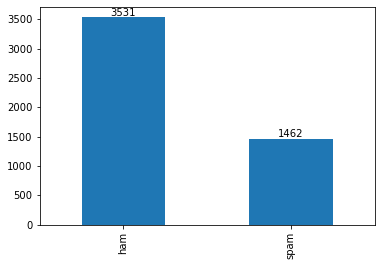

In [12]:

value_counts = df['label'].value_counts()
ax = value_counts.plot(kind='bar')
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom')
# from  here we understand there is imbalance in data set 

In [13]:
import nltk 
! pip install nltk 

In [14]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91951\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [16]:
df.shape

(4993, 2)

In [17]:
df['word_count_v2'] = df['text'].apply(nltk.word_tokenize).apply(len)

In [18]:
df.head()

,label,text,word_count_v2
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",551
3,spam,"Subject: photoshop , windows , office . cheap ...",49
4,ham,Subject: re : indian springs\r\nthis deal is t...,71


In [19]:
df.loc[:, 'sentence_count_v2'] = df['text'].apply(nltk.sent_tokenize).apply(len)


In [20]:
df.head()

,label,text,word_count_v2,sentence_count_v2
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",24,1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",551,20
3,spam,"Subject: photoshop , windows , office . cheap ...",49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,71,3


In [21]:
df.describe()

,word_count_v2,sentence_count_v2
count,4993.000000,4993.000000
mean,233.678149,10.202884
std,340.702932,22.003030
min,2.000000,1.000000
25%,55.000000,3.000000
50%,125.000000,6.000000
75%,288.000000,12.000000
max,8863.000000,1163.000000


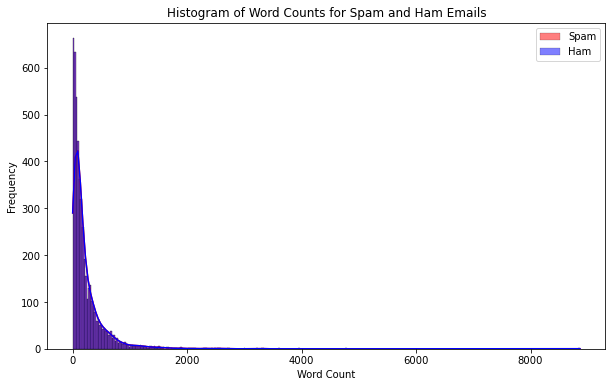

In [22]:
plt.figure(figsize=(10, 6))  
sns.histplot(df['word_count_v2'], color='red', label='Spam', kde=True)
sns.histplot(df['word_count_v2'], color='blue', label='Ham', kde=True)

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts for Spam and Ham Emails')
plt.legend()
plt.show()

# from this plot we understand more spam mails are with higher word count 

In [23]:
# encoding target variable 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.loc[:, "label"] = encoder.fit_transform(df["label"])

In [24]:
df.head()

,label,text,word_count_v2,sentence_count_v2
0,0,Subject: enron methanol ; meter # : 988291\r\n...,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",24,1
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",551,20
3,1,"Subject: photoshop , windows , office . cheap ...",49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,71,3


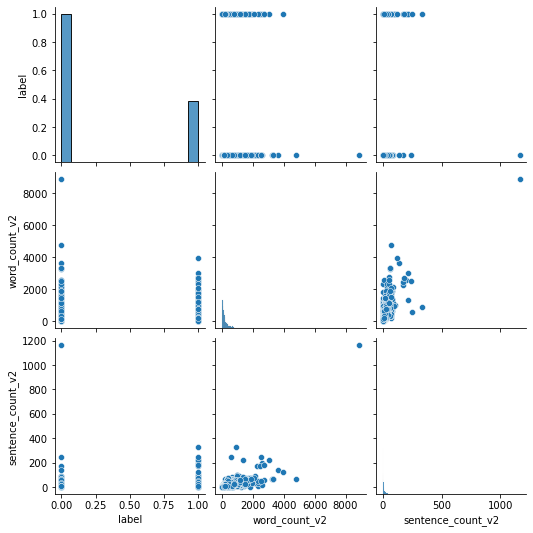

In [25]:
#check for pairplot
sns.pairplot(df)

In [26]:
values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 70.71900660925296
percentage of 1 : 29.280993390747046


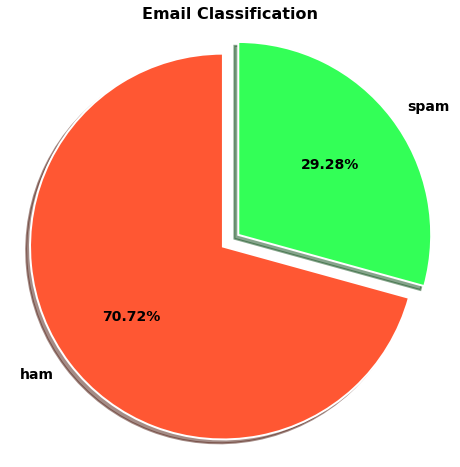

In [27]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [28]:
df.head()

,label,text,word_count_v2,sentence_count_v2
0,0,Subject: enron methanol ; meter # : 988291\r\n...,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",24,1
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",551,20
3,1,"Subject: photoshop , windows , office . cheap ...",49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,71,3


### Text preprocessing 

In [29]:
from nltk.corpus  import stopwords


In [30]:
#use porter stemming
import string 
from nltk.stem.porter import PorterStemmer


In [31]:
def preprocess_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

In [32]:
#apply transformation function to text
df["transformed"] = df["text"].apply(preprocess_text )



In [33]:
#check now
df.head()

,label,text,word_count_v2,sentence_count_v2,transformed
0,0,Subject: enron methanol ; meter # : 988291\r\n...,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,71,3,subject indian spring deal book teco pvr reven...


In [34]:
pip install wordcloud 

In [35]:

from wordcloud import WordCloud
wc= WordCloud( height = 800, width = 900, min_font_size = 10, background_color = "black")

In [36]:
spam_word = wc.generate(df[df["label"] == 1]["transformed"].str.cat(sep = " "))

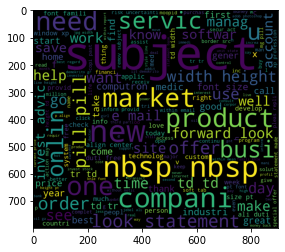

In [37]:
plt.imshow(spam_word)

In [38]:
df.head()

,label,text,word_count_v2,sentence_count_v2,transformed
0,0,Subject: enron methanol ; meter # : 988291\r\n...,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",24,1,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",551,20,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,71,3,subject indian spring deal book teco pvr reven...


In [39]:
# text vectorization

### uning countvector methods

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [41]:
X = cv.fit_transform(df["transformed"]).toarray()

In [42]:
X.shape

(4993, 42592)

In [43]:
y= df["label"]


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [46]:
#use Naive Bayes method
from sklearn.metrics import accuracy_score, precision_score
gnb = GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

# Predictions
gnb_predictions = gnb.predict(X_test)
mnb_predictions = mnb.predict(X_test)
bnb_predictions = bnb.predict(X_test)


gnb_accuracy = accuracy_score(y_test, gnb_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)

gnb_precision = precision_score(y_test, gnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions)
bnb_precision = precision_score(y_test, bnb_predictions)

print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Precision:", gnb_precision)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Precision:", mnb_precision)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
print("Bernoulli Naive Bayes Precision:", bnb_precision)


Gaussian Naive Bayes Accuracy: 0.953953953953954
Gaussian Naive Bayes Precision: 0.9299610894941635
Multinomial Naive Bayes Accuracy: 0.9769769769769769
Multinomial Naive Bayes Precision: 0.9452554744525548
Bernoulli Naive Bayes Accuracy: 0.8838838838838838
Bernoulli Naive Bayes Precision: 0.9171270718232044


In [47]:
#use SVM method
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_classifier = SVC(kernel='linear', random_state=42)


svm_classifier.fit(X_train, y_train)


svm_predictions = svm_classifier.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)


Support Vector Machine (SVM) Accuracy: 0.95995995995996


### using tfidf vectorizer 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["transformed"]).toarray()


In [49]:
X.shape

(4993, 42592)

In [50]:
# use tfidf vectorizer method for naive bayes 

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, precision_score

GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)


gnb_predictions = gnb.predict(X_test)
mnb_predictions = mnb.predict(X_test)
bnb_predictions = bnb.predict(X_test)

gnb_accuracy = accuracy_score(y_test, gnb_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)


gnb_precision = precision_score(y_test, gnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions)
bnb_precision = precision_score(y_test, bnb_predictions)


print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Precision:", gnb_precision)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Precision:", mnb_precision)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
print("Bernoulli Naive Bayes Precision:", bnb_precision)


Gaussian Naive Bayes Accuracy: 0.9409409409409409
Gaussian Naive Bayes Precision: 0.8795620437956204
Multinomial Naive Bayes Accuracy: 0.928928928928929
Multinomial Naive Bayes Precision: 1.0
Bernoulli Naive Bayes Accuracy: 0.8838838838838838
Bernoulli Naive Bayes Precision: 0.9171270718232044


## Using KNN and Random forest model  

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()


rf_classifier = RandomForestClassifier()

knn_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate precision
knn_precision = precision_score(y_test, knn_predictions)
rf_precision = precision_score(y_test, rf_predictions)

# Print accuracy and precision
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)


KNN Accuracy: 0.963963963963964
KNN Precision: 0.9714285714285714
Random Forest Accuracy: 0.977977977977978
Random Forest Precision: 0.9390681003584229


#using mnb and tfidf approach 

In [52]:
import pickle 
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("mnb.pkl", "wb"))